In [64]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [65]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [67]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [68]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [69]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [70]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [71]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [72]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [73]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement).order_by(measurement.date.desc()).first()
print(most_recent_date.date)

2017-08-23


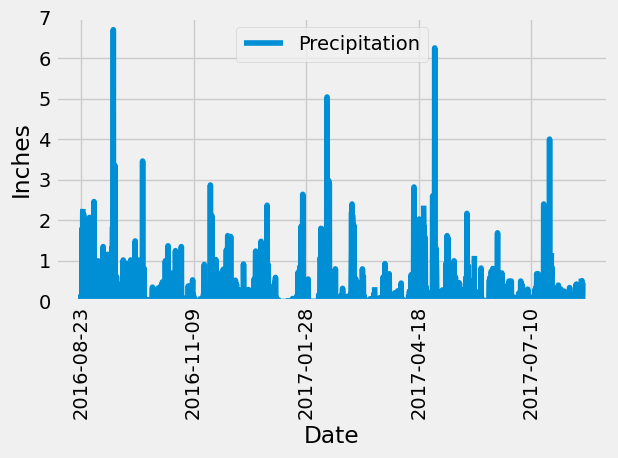

In [74]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#one_year_ago

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > '2016-08-22').\
    order_by(measurement.date).all()
#precipitation_data

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_data_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])
#precipitation_data_df

# Sort the dataframe by date
sort = precipitation_data_df.set_index('Date')

# Use Pandas Plotting with Matplotlib to plot the data
sort.plot()
plt.ylim(0,7)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()

In [75]:
# Use Pandas to calculate the summary statistics for the precipitation data
sort.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [76]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station.station).count()
total_stations

9

In [77]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station,func.count(measurement.station)).\
    order_by(func.count(measurement.station).desc()).\
    group_by(measurement.station).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [78]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(func.min(measurement.tobs), 
func.max(measurement.tobs), 
func.avg(measurement.tobs)).\
    filter(measurement.station == "USC00519281").first()
most_active_station

(54.0, 85.0, 71.66378066378067)

Text(0.5, 0, 'Temperature')

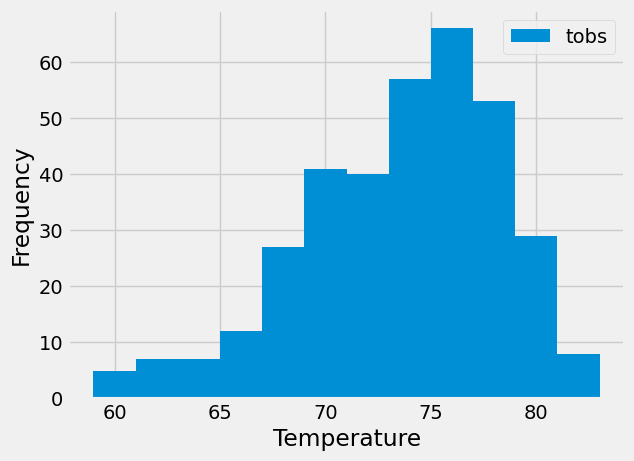

In [80]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_active_12_months = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date > "2016-08-22").\
    filter(measurement.station == "USC00519281").all()
most_active_12_months_df = pd.DataFrame(most_active_12_months)
most_active_12_months_df.plot(kind="hist", bins=12)
plt.xlabel("Temperature")

# Close Session

In [81]:
# Close Session
session.close()